用いたデータ：統計科学研究所 成績csv\
https://statistics.co.jp/reference/statistical_data/statistical_data.htm

### 必要なライブラリ・メソッドのインポート

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

### 成績データの読み込み

In [25]:
seiseki = pd.read_csv("seiseki.csv")
seiseki

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
0,30,43,51,63,60,66,37,44,20
1,39,21,49,56,70,72,56,63,16
2,29,30,23,57,69,76,33,54,6
3,95,87,77,100,77,82,78,96,87
4,70,71,78,67,72,82,46,63,44
...,...,...,...,...,...,...,...,...,...
161,82,78,80,88,80,69,83,78,90
162,0,8,2,9,5,18,42,2,1
163,45,26,29,24,31,57,68,40,27
164,73,31,43,32,59,64,82,48,56


## 欠損値の扱い
今回用いたデータセットは非常に綺麗なデータセットなため、欠損値はなし。\
ここでは欠損値があった場合の一例を紹介しています。\
1, 欠損値の確認の仕方\
2, 欠損値の補完\
3, 欠損値の削除

### 欠損値の確認：isnullメソッド
→ isnullメソッドを使うと、欠損している部分にTrue,それ以外をFalseとする。

In [17]:
seiseki.isnull()

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
161,False,False,False,False,False,False,False,False,False
162,False,False,False,False,False,False,False,False,False
163,False,False,False,False,False,False,False,False,False
164,False,False,False,False,False,False,False,False,False


→ isnullメソッドを用いると、省略された部分の欠損値の有無が把握できない
### isnullメソッド + sumメソッド

In [18]:
seiseki.isnull().sum()

kokugo    0
shakai    0
sugaku    0
rika      0
ongaku    0
bijutu    0
taiiku    0
gika      0
eigo      0
dtype: int64

### 欠損値の補完：fillnaメソッド 
引数で補完する値を指定できる。\
(例1) 0で補完したい場合：fillna(0)
(例2) 0で補完したい場合：fillna(0)

In [19]:
### 例1 0で補完
seiseki.fillna(0)

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
0,30,43,51,63,60,66,37,44,20
1,39,21,49,56,70,72,56,63,16
2,29,30,23,57,69,76,33,54,6
3,95,87,77,100,77,82,78,96,87
4,70,71,78,67,72,82,46,63,44
...,...,...,...,...,...,...,...,...,...
161,82,78,80,88,80,69,83,78,90
162,0,8,2,9,5,18,42,2,1
163,45,26,29,24,31,57,68,40,27
164,73,31,43,32,59,64,82,48,56


In [ ]:
### 例2 平均で補完
seiseki.fillna(seiseki.mean())

### 欠損値の削除：dropnaメソッド

In [ ]:
### 欠損値のある列を削除：axis=0
seiseki.dropna(axis=0)

### 欠損値のある行を削除：axis=1
seiseki.dropna(axis=1)

## 外れ値の有無を確認
ここで紹介する「外れ値の確認方法」はあくまで一例。\
最終的には、データの状況に合わせる必要がある。\
・要約統計量の確認\
・ヒストグラムで分布を確認

### 要約統計量の確認：describeメソッド

In [4]:
seiseki.describe()

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,52.331325,39.602410,45.614458,49.885542,42.331325,62.457831,57.740964,47.307229,39.084337
std,21.835858,21.456335,24.236127,21.408130,22.894855,17.188298,26.577943,22.519397,29.507351
min,0.000000,4.000000,0.000000,9.000000,2.000000,15.000000,2.000000,2.000000,0.000000
25%,35.000000,23.000000,28.000000,31.000000,25.250000,52.000000,35.250000,31.250000,12.000000
50%,53.000000,35.000000,43.000000,49.000000,41.500000,65.000000,60.000000,48.500000,35.000000
75%,70.000000,53.750000,63.750000,65.750000,58.750000,75.750000,82.000000,65.000000,66.750000
max,96.000000,90.000000,100.000000,100.000000,96.000000,99.000000,99.000000,100.000000,99.000000


### ヒストグラムでデータの分布を確認

In [6]:
import gc
import matplotlib.gridspec as gridspec

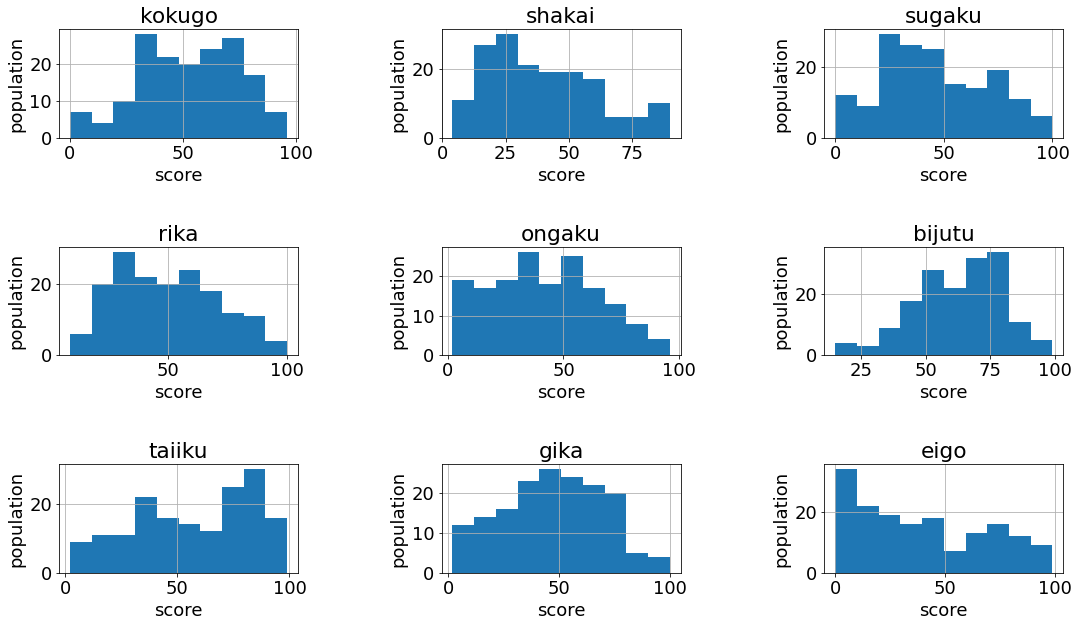

In [16]:
### グラフのサイズやフォントのサイズの設定
plt.rcParams["font.size"] = 18
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(3, 3, wspace=0.6, hspace=1)

### 科目数だけグラフを表示したいので、科目の数だけループする。
for i in range(len(seiseki.columns)):
    gs_0 = i%3
    gs_1 = i//3
    
    ### ヒストグラムを表示
    ax = plt.subplot(gs[gs_1, gs_0])
    seiseki[seiseki.columns[i]].hist()
    plt.title(seiseki.columns[i])
    plt.xlabel("score")
    plt.ylabel("population")

### アンダーサンプリングが必要か確認する。
主に分類問題の場合などに、確認する必要がある。\
(例)\
最優秀な生徒(label=1)の人数：1000\
優秀な生徒(label=1)の人数：500\
の場合、そのまま学習させると最優秀な生徒と分類する確率が上がってしまい、偏った予測・分類になってしまう。\
この際に用いるのが"アンダーサンプリング"\
サンプル数が少ない方に合わせて、偏りのない予測・分析を行う。

In [26]:
### 以下ではKmeansを用いてクラスタリングを行っている。
### アンダーサンプリングの有無とは関係なし
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(seiseki)
cluster = kmeans.predict(seiseki)
seiseki_cluster = seiseki.copy()
seiseki_cluster["cluster"] = cluster
seiseki_cluster

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo,cluster
0,30,43,51,63,60,66,37,44,20,2
1,39,21,49,56,70,72,56,63,16,2
2,29,30,23,57,69,76,33,54,6,2
3,95,87,77,100,77,82,78,96,87,0
4,70,71,78,67,72,82,46,63,44,0
...,...,...,...,...,...,...,...,...,...,...
161,82,78,80,88,80,69,83,78,90,0
162,0,8,2,9,5,18,42,2,1,1
163,45,26,29,24,31,57,68,40,27,2
164,73,31,43,32,59,64,82,48,56,2


In [32]:
### 各クラスターの人数を確認する。
print("0クラスター：{0}人".format( len(seiseki_cluster[seiseki_cluster["cluster"]==0]) ) )
print("1クラスター：{0}人".format( len(seiseki_cluster[seiseki_cluster["cluster"]==1]) ) )
print("2クラスター：{0}人".format( len(seiseki_cluster[seiseki_cluster["cluster"]==2]) ) )

0クラスター：55人
1クラスター：42人
2クラスター：69人


### 実際にアンダーサンプリングを行う。
今回は一番人数の少なかった42人に合わせる。

In [41]:
### 0クラスターの人数を42人に合わせる。
seiseki_class1 = seiseki_cluster[seiseki_cluster["cluster"]==0] #0クラスターのみ抽出
seiseki_class1_af = seiseki_class1[:42] # 先頭42人のみ抽出
len(seiseki_class1_af)==42 # Trueなので42人にアンダーサンプリングできた

True